### 1.2. Методы сужения интервалов неопределенности

In [11]:
import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as plt
plt.style.use('ggplot')

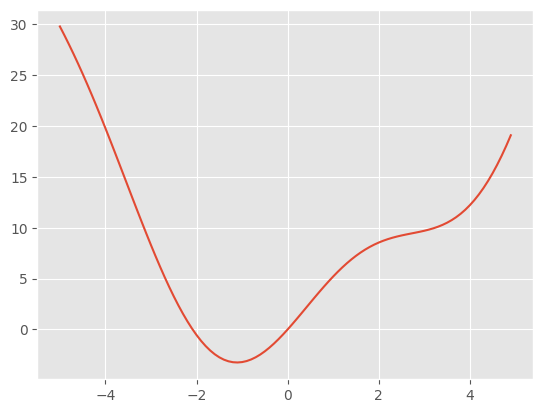

In [12]:
# рассмотрим простую функцию и нарисуем ее график
def f1(x):
    return x**2 + 5*np.sin(x)

x = np.arange(-5, 5, 0.1)
plt.plot(x, f1(x))

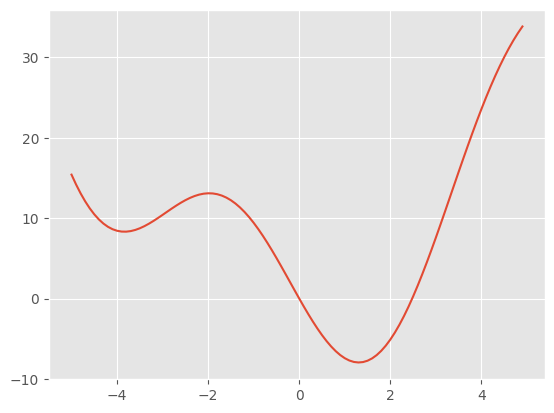

In [13]:
# рассмотрим другую функцию и нарисуем ее график
def f1(x):
    return x**2 - 10*np.sin(x)

x = np.arange(-5, 5, 0.1)
plt.plot(x, f1(x))

#### Методы сужения интервала неопределенности

In [36]:
# зададим функцию с несколькими экстремумами
def f(x):
    return x**2 - 10*np.sin(x)

def dfdx(x):
    return 2*x - 10*np.cos(x)

a, b = -2, 2
x1, x2 = -0.1, 0.1

print('f(x1) = {:5.3f}'.format(f(x1)))
print('f(x2) = {:5.3f}'.format(f(x2)))

f(x1) = 1.008
f(x2) = -0.988


In [27]:
a, b = -0.1, 2

x1 = (a+b)/2 - 0.1
x2 = (a+b)/2 + 0.1

print('x1 = {:5.3f}'.format(x1))
print('x2 = {:5.3f}'.format(x2))

print('f(x1) = {:5.3f}'.format(f(x1)))
print('f(x2) = {:5.3f}'.format(f(x2)))

x1 = 0.850
x2 = 1.050
f(x1) = -6.790
f(x2) = -7.572


In [28]:
a, b = x1, b
print('[a,b] = ', a, b)

x1 = (a+b)/2 - 0.1
x2 = (a+b)/2 + 0.1

print('x1 = {:5.3f}'.format(x1))
print('x2 = {:5.3f}'.format(x2))

print('f(x1) = {:5.3f}'.format(f(x1)))
print('f(x2) = {:5.3f}'.format(f(x2)))

[a,b] =  0.85 2
x1 = 1.325
x2 = 1.525
f(x1) = -7.944
f(x2) = -7.664


#### Сужение интервала неопределенности: Метод дихотомии

In [29]:
# Метод дихотомии
def dihot(f, a, b, dx=0.01, eps_x=0.025):
    nf = 0
    while (b-a)/2 > eps_x:
        x1 = (a+b)/2 - dx
        x2 = (a+b)/2 + dx
        f1 = f(x1)
        f2 = f(x2)
        nf += 2
        if f1 < f2:
            b = x2
        elif f1 > f2:
            a = x1
        else:
            a = x1
            b = x2
    return (a+b)/2, (b-a)/2, nf

In [70]:
# Найдем минимум функции методом дихотомии
x_opt, eps_x, nf = dihot(f, -2, 2)

print('Получено приближение x={:6.3f} f(x)={:6.3f} с точностью {:6.4f}; использовано {} вычислений функции'.format(x_opt, f(x_opt), eps_x, nf))
print('Точность решения по производной равна: {:6.3f}'.format(abs(dfdx(x_opt))))



Получено приближение x= 1.314 f(x)=-7.946 с точностью 0.0178; использовано 16 вычислений функции
Точность решения по производной равна:  0.085


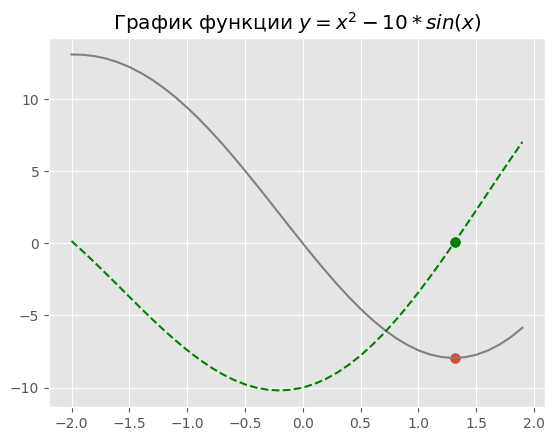

In [47]:
# Проверим решение графически
x = np.arange(-2, 2, 0.1)
plt.plot(x, f(x), c='grey')
plt.plot(x, dfdx(x), 'g--')
plt.scatter(x_opt, f(x_opt), marker='o', s=50)
plt.scatter(x_opt, dfdx(x_opt), c = 'green', marker='o', s=50)
plt.title('График функции $y=x^2 - 10*sin(x)$')
plt.show()

In [72]:
# Найдем минимум функции методом дихотомии с большей точностью
x_opt, eps_x, nf = dihot(f, -2, 2, dx=0.0001, eps_x=0.001)

print('Получено приближение x={:6.3f} f(x)={:6.3f} с точностью {:6.4f}; использовано {} вычислений функции'.format(x_opt, f(x_opt), eps_x, nf))
print('Точность решения по производной равна: {:6.3f}'.format(abs(dfdx(x_opt))))

Получено приближение x= 1.306 f(x)=-7.946 с точностью 0.0006; использовано 24 вычислений функции
Точность решения по производной равна:  0.004


#### Метод золотого сечения


In [73]:
# Вычислим тау
tau = (1 + np.sqrt(5))/2
tau

9.129523843150775

In [78]:
# Метод золотого сечения
def gs(f, a, b, eps_x=0.025):
    nf = 0
    tau = (1 + np.sqrt(5))/2

    if (b-a)/2 > eps_x:
        coeff = (b-a)/tau
        x1 = b - coeff
        x2 = a + coeff
        f1 = f(x1)
        f2 = f(x2)
        nf += 2

    while (b-a)/2 > eps_x:
        if f1 < f2:
            b = x2
            x2 = x1
            coeff = (b-a)/tau
            x1 = b - coeff
            f2 = f1
            f1 = f(x1)
            nf += 1
        elif f1 > f2:
            a = x1
            x1 = x2
            coeff = (b-a)/tau
            x2 = a + coeff
            f1 = f2
            f2 = f(x2)
            nf += 1
        else:
            a = x1
            b = x2
            coeff = (b-a)/tau
            x1 = b - coeff
            x2 = a + coeff
            f1 = f(x1)
            f2 = f(x2)
            nf += 2
    return (a+b)/2, (b-a)/2, nf

In [79]:
# Найдем минимум функции методом золотого сечения
x_opt, eps_x, nf = gs(f, -2, 2)

print('Получено приближение x={:6.3f} f(x)={:6.3f} с точностью {:6.4f}; использовано {} вычислений функции'.format(x_opt, f(x_opt), eps_x, nf))
print('Точность решения по производной равна: {:6.3f}'.format(abs(dfdx(x_opt))))

Получено приближение x= 1.315 f(x)=-7.945 с точностью 0.0163; использовано 12 вычислений функции
Точность решения по производной равна:  0.100


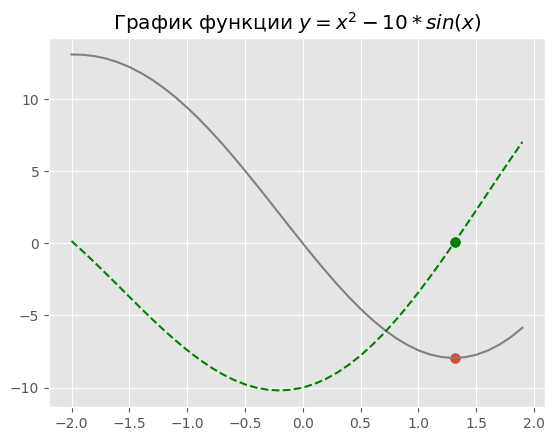

In [80]:
# Проверим решение графически
x = np.arange(-2, 2, 0.1)
plt.plot(x, f(x), c='grey')
plt.plot(x, dfdx(x), 'g--')
plt.scatter(x_opt, f(x_opt), marker='o', s=50)
plt.scatter(x_opt, dfdx(x_opt), c = 'green', marker='o', s=50)
plt.title('График функции $y=x^2 - 10*sin(x)$')
plt.show()